# Lending club

LendingClub is a fintech that provides range of financial products and services through a technology-driven platform in the United States. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market.  The company claims that $15.98 billion in loans had been originated through its platform up to December 31, 2015.



LendingClub also makes traditional direct to consumer loans, including automobile refinance transactions, through WebBank, an FDIC-insured, state-chartered industrial bank that is headquartered in Salt Lake City Utah. The loans are not funded by investors but are assigned to other financial institutions.

The company raised $1 billion in what became the largest technology IPO of 2014 in the United States. 

# Problem statement

LendingClub experienced problems in late 2015 to early 2016, with issues relating to its lending policies and taking excessive risks. As a result, among other factors, the share price of lending club fell sharply afterwards. This corresponds with the dataset timeline of our dataset, where lending was lax leading up to its fall. This project looks at a standpoint from a consultant, advising Lending club on how it could have managed its credit risk by calculating RWA/credit scoring based on the IRB approach from the Basel 3 framework CRE35.  

Credit scoring is a statistical model that combines several financial characteristics to evaluate a default risk of an enterprise by a single score to assess a customer creditworthiness.
It works in a regulated framework: Basel II/III that is an internationally agreed set of measures developed by the Basel Committee on Banking Supervision regarding the capital requirements of banks, according to which banks must set aside proportional shares of capital, based on the risk assumed and evaluated by a rating tool.

Basel II/III is structured in “three pillars”: minimum capital requirements, supervisory review and market discipline.
In the pillar I there are 3 approaches to evaluate credit risk: standard, foundation and advanced.
In the first approach banks don’t develop any internal model and for the minimal capital requirements banks use rating from external agencies, instead for the third approach banks develop an internal model to evaluate the expected loss (EL). Hence, our problem statement is

1. Analyzing which top 5 features affect probability of default since this is the most crucial to the business.
2. Developing a model to predict this probability of default
3. Developing a model to predict the Exposure at default
4. Developing a model to predict the Loss given default

# What is Expected loss?

Expected loss= PD* LGD *EAD

Lets say A is a borrower from a bank

Probability of default(PD)- represents the chance that A would default on its debt obligation which is calculated using past trends of of people similar to A. We will explore this in Modelling-PD section workbook where we will build a machine learning model to calcualte the probability of default of each individual

Exposure at default(EAD)- is the gross amount that the bank stands to lose if A defaults. We will explore this in Modelling-EAD section workbook where we will build a machine learning model to predict the quantum of the exposure at default

Loss given default(LGD)- every loan is given at margin & Lien and if some default event occurs, part of the lien can be recovered from those securities( e.g value of mortgaged house). Loss given default represents the proportion of loss out of the total monies lent to A after recovering from the fire sale of the house. Credit conversion factor(CCF) is the proportion of the current undrawn amount(i.e loans that the Lender has agreed to be made available to the Borrower under a Revolving Credit Facility) that will be drawn down at the time of default. We will explore this in Modelling-LGD section workbook where we will build the best machine learning model to calcualte the LGD based on historical data.




## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,metrics 
from pandas import DataFrame
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import warnings
warnings.filterwarnings('ignore')



## Import Data
The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/wendykan/lending-club-loan-data/version/1
We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

In [2]:
loan_data = pd.read_csv('loan_data_2007_2014.csv')

In [3]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [4]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [6]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 


The full dataset has 150 features for each loan. We'll select features in two steps:

1. Drop features with more than 30% of their data missing.
2. Of the remaining features, choose only those that would be available to an investor before deciding to fund the loan.

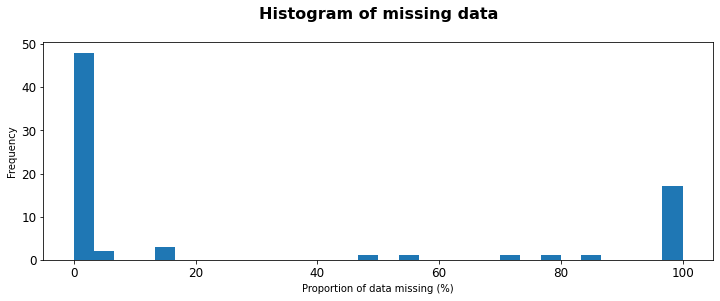

In [7]:
missing_data = loan_data.isnull().mean().sort_values(ascending=False)*100

missing_data
# Setting the formatting of the figure:
plt.figure(figsize=(12,4))
plt.title('Histogram of missing data\n', fontsize=16, fontweight='bold')
plt.xlabel('Proportion of data missing (%)')
plt.ylabel('Count')

# Setting the figure up:
missing_data.plot.hist(bins=30, fontsize=12);

## Data cleaning

In [8]:
columns_to_drop = sorted(list(missing_data[missing_data > 30].index))
print("Columns with less than 70% of the data included:\n"+str(columns_to_drop))

Columns with less than 70% of the data included:
['all_util', 'annual_inc_joint', 'desc', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'next_pymnt_d', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'total_bal_il', 'total_cu_tl', 'verification_status_joint']


In [9]:
loan_data.drop(labels=columns_to_drop, axis=1, inplace=True)

In [10]:
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type'], axis = 1, inplace = True)
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,NaN,NaN,NaN


The following columns have little to no bearing to our model prediction as it contains mostly borrower details as well as post-loan approval details. Therefore, we will be removing these columns. Note that I have not removed "recoveries" athough this pertains to post-loan approvals as we will need it in our later section when we are calculating LGD and EAD.


In [11]:
loan_data.drop(["Unnamed: 0","id", "member_id", "url", "title", "funded_amnt_inv","emp_title", "zip_code", "last_credit_pull_d", "addr_state","out_prncp_inv","total_pymnt_inv", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_int", "total_rec_late_fee", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt","tot_coll_amt", "tot_cur_bal","total_rev_hi_lim","inq_last_6mths"], axis = 1, inplace = True)

In [12]:
loan_data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,total_rec_prncp,recoveries
0,5000,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,3.0,0.0,83.7,9.0,5000.00,0.00
1,2500,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,3.0,0.0,9.4,4.0,456.46,117.08
2,2400,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2.0,0.0,98.5,10.0,2400.00,0.00
3,10000,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,10.0,0.0,21.0,37.0,10000.00,0.00
4,3000,3000,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,15.0,0.0,53.9,38.0,2233.10,0.00


In [13]:
loan_data.columns.values

array(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'total_rec_prncp', 'recoveries'], dtype=object)

## Data cleaning

In [14]:
loan_data.isna().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length             21008
home_ownership             0
annual_inc                 4
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
earliest_cr_line          29
open_acc                  29
pub_rec                   29
revol_util               340
total_acc                 29
total_rec_prncp            0
recoveries                 0
dtype: int64

In [15]:
loan_data['emp_length'].unique()
# Displays unique values of a column.

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [16]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [17]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

To standardise, the employment length variables, we will need to manually change the employment length variables to cater for the different formats. 10+years, nan and <1 year.

In [18]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace('n/a',  str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year', '')
# We store the preprocessed ‘employment length’ variable in a new variable called ‘employment length int’,


Also the missing values are in very low percentage. We will therefore, drop them from our dataset.

In [19]:
loan_data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,total_rec_prncp,recoveries
0,5000,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,3.0,0.0,83.7,9.0,5000.00,0.00
1,2500,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,3.0,0.0,9.4,4.0,456.46,117.08
2,2400,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2.0,0.0,98.5,10.0,2400.00,0.00
3,10000,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,10.0,0.0,21.0,37.0,10000.00,0.00
4,3000,3000,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,15.0,0.0,53.9,38.0,2233.10,0.00


In [20]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.isna().sum()

loan_amnt              0
funded_amnt            0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
total_rec_prncp        0
recoveries             0
dtype: int64

In [21]:
loan_data['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

The date field in earliest credit line field is currently a string and we want to change it to date format

In [22]:
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.

To take a reference date Dec 2017(year of scandals) occurance to subtract earliest credit line date to convert in terms of days and months from credit line issuance.

In [23]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.

In [24]:
loan_data['mths_since_earliest_cr_line'].describe()


count    465945.000000
mean        239.480668
std          93.986756
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Why are there negative values? To explore rows with negative values and special handle. 

In [25]:
loan_data.loc[: , ['earliest_cr_line', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]
# We take all rows for three columns from the dataframe. Then, we display them only for the rows where a variable has negative value.


,earliest_cr_line,mths_since_earliest_cr_line
1580,2062-09-01,-537.0
1770,2068-09-01,-609.0
2799,2064-09-01,-561.0
3282,2067-09-01,-597.0
3359,2065-02-01,-566.0
...,...,...
464003,2068-01-01,-601.0
464260,2066-07-01,-583.0
465100,2067-10-01,-598.0
465500,2067-09-01,-597.0


For these negative values, to impute the values with a ceiling of the maximum observed difference( in months)

In [26]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()
# We set the rows that had negative differences to the maximum value.

In [27]:
loan_data.drop(['earliest_cr_line'], axis = 1, inplace = True)
loan_data['term'].describe()
# Shows some descriptive statisics for the values of a column.

count         465945
unique             2
top        36 months
freq          337693
Name: term, dtype: object

In [28]:
loan_data['term'] = loan_data['term'].str.replace(' months', '')
# We replace a string with another string, in this case, with an empty strng (i.e. with nothing).

In [29]:
loan_data['term'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.


In [30]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 465945, dtype: object

In [31]:
# Assume we are now in December 2017
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.

loan_data['mths_since_issue_d'].describe()
# Shows some descriptive statisics for the values of a column.

count    465945.000000
mean         51.245681
std          14.320857
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [32]:
loan_data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,open_acc,pub_rec,revol_util,total_acc,total_rec_prncp,recoveries,mths_since_earliest_cr_line,mths_since_issue_d
0,5000,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,3.0,0.0,83.7,9.0,5000.00,0.00,395.0,72.0
1,2500,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,3.0,0.0,9.4,4.0,456.46,117.08,224.0,72.0
2,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2.0,0.0,98.5,10.0,2400.00,0.00,193.0,72.0
3,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,10.0,0.0,21.0,37.0,10000.00,0.00,262.0,72.0
4,3000,3000,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,17.94,15.0,0.0,53.9,38.0,2233.10,0.00,263.0,72.0


### Processing outliers

<AxesSubplot:xlabel='annual_inc'>

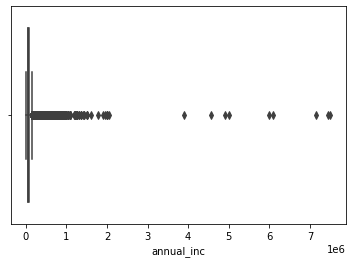

In [33]:
sns.boxplot(loan_data['annual_inc'])

We have noted that there were outliers in our EDA below. We will thus attempt to remove them. We will do this process iteratiovely in conjunction with EDA process until all outliers are handled.

In [34]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     63000.0
0.75     88863.0
0.90    120000.0
0.95    150000.0
0.97    175000.0
0.98    200000.0
0.99    243916.4
Name: annual_inc, dtype: float64

In [35]:
loan_data = loan_data[loan_data.annual_inc <= loan_data['annual_inc'].quantile(0.95)]

In [36]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))

# PD model

## Data preparation

--

In credit risk modelling, a concept of weight of evidence is being used for feature selection,grouping and predictive strength. This is  a concept taken from  Information Theory which measures the strength of the independent variable to seperate 2  categories of dependent variables. In this case, to predict a good or a bad loan based on various types of varaiables such as grade, interest rate etc. (i.e, an independent varaiable with a higher woe means that the variable has the higher predictive power in seperating between good and bad loans.)

After calculating the woe for each indepdent variable with respect to the dependent variable, we will calculate the Information value of the independent variable with respect to the dependent variable. IV applies monotonicity relationships to scale the predictive power(aka woe) against different weights groups. We will see this demonstrated in variables later in the below section and also by function plot_by_woe later in the workbook.

With these values, we are able to use them to do fineclassing/coarse classing for grouping or feature selection for use in our modelling afterwords.

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [37]:
loan_data['loan_status'].unique()
# Displays unique values of a column.

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [38]:
loan_data['loan_status'].value_counts()
# Calculates the number of observations for each unique value of a variable.

Current                                                213355
Fully Paid                                             176597
Charged Off                                             41258
Late (31-120 days)                                       6656
In Grace Period                                          2985
Does not meet the credit policy. Status:Fully Paid       1839
Late (16-30 days)                                        1170
Default                                                   803
Does not meet the credit policy. Status:Charged Off       704
Name: loan_status, dtype: int64

To add a column for the target/dependent varaiable to see if the loan is good or bad. We Will assign Default, charged off loans, late loans and loans that do not meet the credit policy , charged off as "0" and good loans as "1". 

In [39]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)
loan_data['loan_status'].value_counts(normalize=True, dropna=False)

Current                                                0.479054
Fully Paid                                             0.396520
Charged Off                                            0.092638
Late (31-120 days)                                     0.014945
In Grace Period                                        0.006702
Does not meet the credit policy. Status:Fully Paid     0.004129
Late (16-30 days)                                      0.002627
Default                                                0.001803
Does not meet the credit policy. Status:Charged Off    0.001581
Name: loan_status, dtype: float64

Proportion of good to loan examples = 12.48%


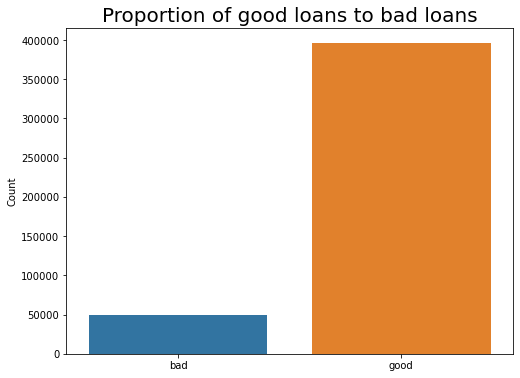

In [40]:
pos = loan_data[loan_data["good_bad"] == 1].shape[0]
neg = loan_data[loan_data["good_bad"] == 0].shape[0]
print(f"Proportion of good to loan examples = {(neg / pos) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(loan_data["good_bad"])
plt.xticks((0, 1), ["bad", "good"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Proportion of good loans to bad loans", y=1, fontdict={"fontsize": 20});

We are going to preprocess the following discrete variables: grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status. 

In [41]:
loan_data['grade_map'] = loan_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

## Exploratory Data Analaysis

<AxesSubplot:>

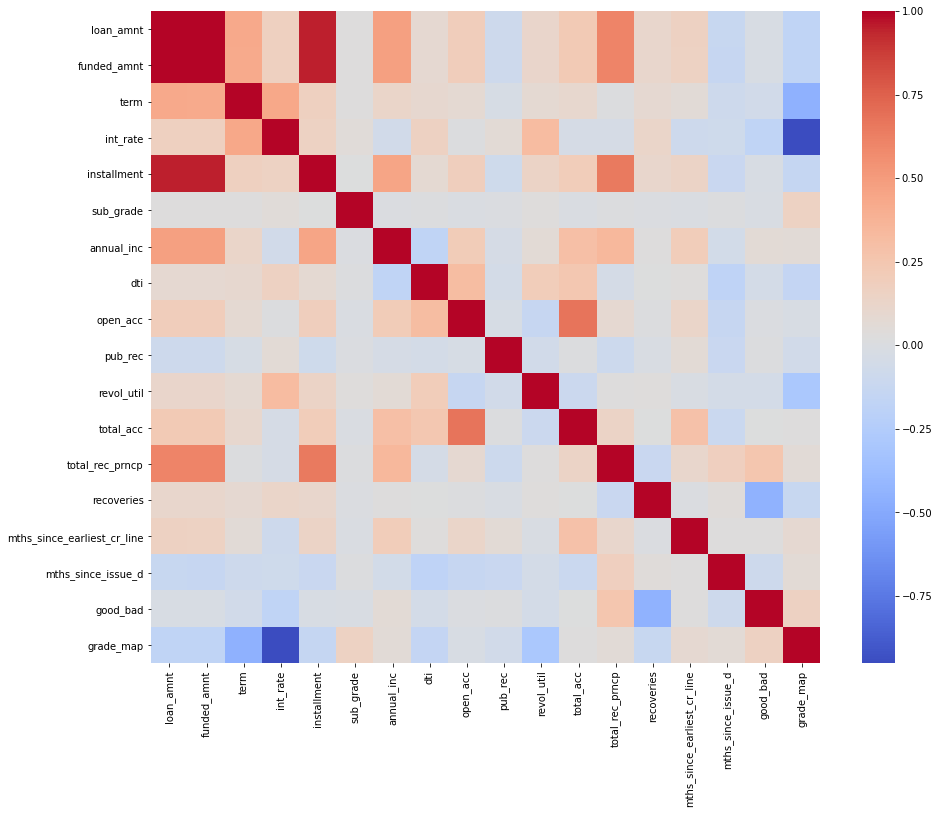

In [42]:
fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(loan_data.corr(), fmt = ".2f", cmap = "coolwarm", ax=ax)

In [43]:
loan_data_corr=loan_data.corr()
loan_data_corr["good_bad"].sort_values(ascending=True).head(10)




recoveries           -0.441707
int_rate             -0.171911
mths_since_issue_d   -0.086627
term                 -0.064325
revol_util           -0.051281
dti                  -0.046131
installment          -0.019744
loan_amnt            -0.017418
funded_amnt          -0.016663
sub_grade            -0.009095
Name: good_bad, dtype: float64

We noted that interest rate, months since issue date, grade, term and recoveries are the top 5 determinants of probability of default. We will therefore examine them espeically

In [44]:
def plot_graph(col_name, full_name):
   
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
      
    sns.distplot(loan_data.loc[loan_data[col_name].notnull(), col_name], kde=False, ax=ax1)
    
          
    # plot2: bar plot of the variable grouped by loan_status
    
        
    sns.boxplot(x=col_name, y='loan_status', data=loan_data)
        
    plt.tight_layout()

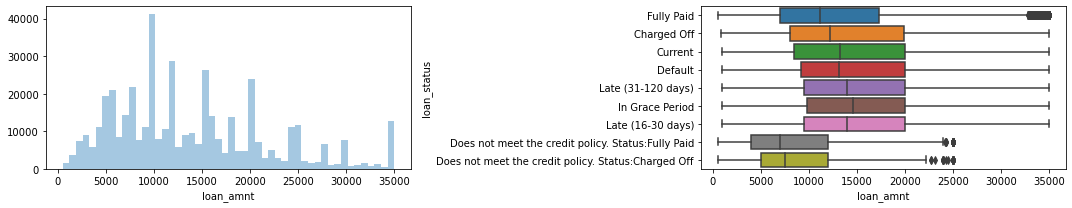

In [45]:
plot_graph('loan_amnt', 'Loan Amount')

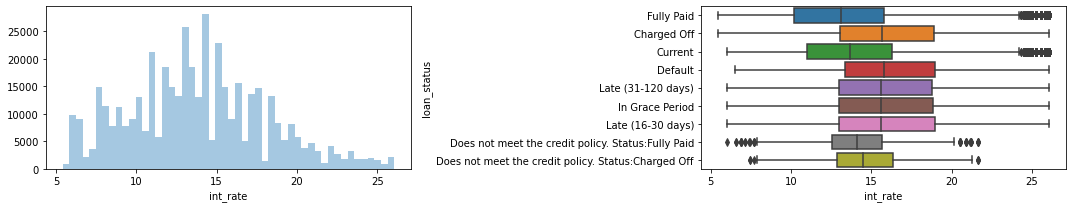

In [46]:
plot_graph('int_rate', 'Interest Rate')

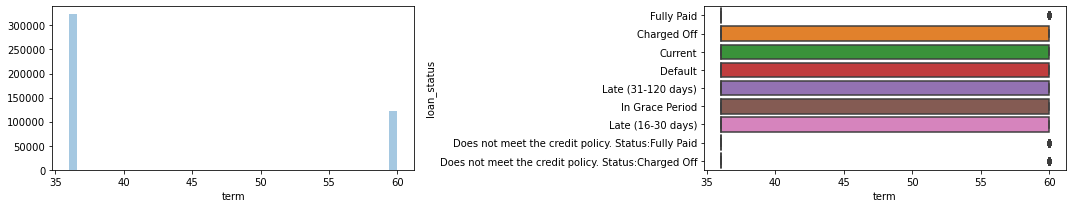

In [47]:
plot_graph('term', 'Term')

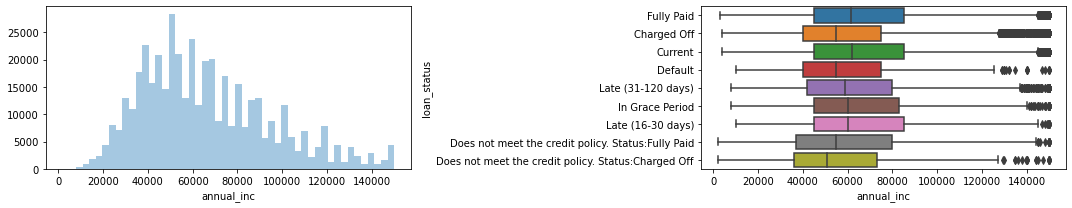

In [48]:
plot_graph('annual_inc', 'Annual Income')

<AxesSubplot:xlabel='grade', ylabel='count'>

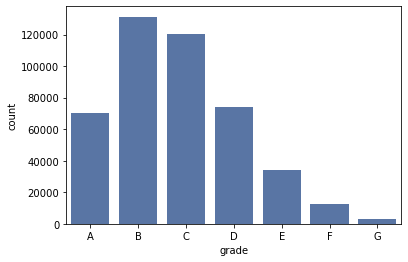

In [49]:
sns.countplot(loan_data['grade'], order=sorted(loan_data['grade'].unique()), color='#5975A4', saturation=1)


### Processing catergorical variables (Dummification)

In [50]:
cat_features=['grade','sub_grade','purpose','home_ownership','verification_status']
loan_data.drop(['grade_map'], axis = 1, inplace = True)
loan_data = pd.get_dummies(loan_data, columns = cat_features, drop_first=True)

In [51]:
loan_data.shape

(445367, 49)

In [52]:
loan_data.columns.values

array(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'emp_length', 'annual_inc', 'issue_d', 'loan_status', 'dti',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'total_rec_prncp', 'recoveries', 'mths_since_earliest_cr_line',
       'mths_since_issue_d', 'good_bad', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G', 'sub_grade_2', 'sub_grade_3',
       'sub_grade_4', 'sub_grade_5', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified'], dtype

In [53]:
removed_columns=['good_bad','issue_d','loan_status']

features=[col for col in loan_data.columns if col not in removed_columns]
X=loan_data[features]
y=loan_data['good_bad']


In [54]:
X.shape

(445367, 46)

In [55]:
y.shape

(445367,)

In [56]:
X.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_util,total_acc,total_rec_prncp,recoveries,mths_since_earliest_cr_line,mths_since_issue_d,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_2,sub_grade_3,sub_grade_4,sub_grade_5,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,5000,5000,36,10.65,162.87,10,24000.0,27.65,3.0,0.0,83.7,9.0,5000.00,0.00,395.0,72.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2500,2500,60,15.27,59.83,0,30000.0,1.00,3.0,0.0,9.4,4.0,456.46,117.08,224.0,72.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,2400,2400,36,15.96,84.33,10,12252.0,8.72,2.0,0.0,98.5,10.0,2400.00,0.00,193.0,72.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,10000,10000,36,13.49,339.31,10,49200.0,20.00,10.0,0.0,21.0,37.0,10000.00,0.00,262.0,72.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,3000,3000,60,12.69,67.79,1,80000.0,17.94,15.0,0.0,53.9,38.0,2233.10,0.00,263.0,72.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [58]:
### Handling for class Imbalance

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
y_train_df = pd.DataFrame(data=y_train.values, columns=['Charged_Off'])
finalDf = pd.concat([principalDf, y_train_df], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Charged_Off
0,0.225350,3.994225,0
1,5.737644,-0.185223,1
2,1.543091,1.900974,1
3,-3.163203,0.937957,1
4,-2.149414,1.383362,1


In [68]:
pca.explained_variance_ratio_

array([0.09963435, 0.05528886])

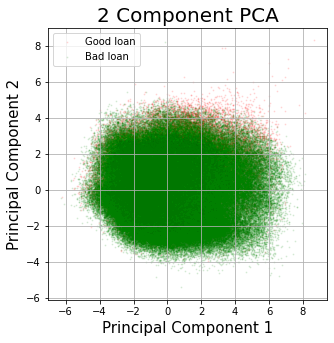

In [69]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Charged_Off'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 1, alpha=0.1)
ax.legend(['Good loan', 'Bad loan'])
ax.grid()

The pca.explained_variance_ratio_ parameter returns a vector of the variance explained by each dimension.There doesnt seem to be a standout seperation between the 2 classes since the explained variance is only 0.1.

In [62]:
loan_data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,open_acc,pub_rec,revol_util,total_acc,total_rec_prncp,recoveries,mths_since_earliest_cr_line,mths_since_issue_d,good_bad,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_2,sub_grade_3,sub_grade_4,sub_grade_5,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,5000,5000,36,10.65,162.87,10,24000.0,2011-12-01,Fully Paid,27.65,3.0,0.0,83.7,9.0,5000.00,0.00,395.0,72.0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2500,2500,60,15.27,59.83,0,30000.0,2011-12-01,Charged Off,1.00,3.0,0.0,9.4,4.0,456.46,117.08,224.0,72.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,2400,2400,36,15.96,84.33,10,12252.0,2011-12-01,Fully Paid,8.72,2.0,0.0,98.5,10.0,2400.00,0.00,193.0,72.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,10000,10000,36,13.49,339.31,10,49200.0,2011-12-01,Fully Paid,20.00,10.0,0.0,21.0,37.0,10000.00,0.00,262.0,72.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,3000,3000,60,12.69,67.79,1,80000.0,2011-12-01,Current,17.94,15.0,0.0,53.9,38.0,2233.10,0.00,263.0,72.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


# loan_data.head()

In [63]:
loan_data.to_csv('loan_data_clean.csv')